In [1]:
import pandas as pd
import numpy as np

In [2]:
import plotly.offline as py
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)  
from plotly.tools import FigureFactory as ff
import pycountry
import random
import squarify
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

ModuleNotFoundError: No module named 'plotly'

In [61]:
df = pd.read_csv('Cleaned_Dataset.csv')
#schema = pd.read_csv('survey_results_schema.csv')

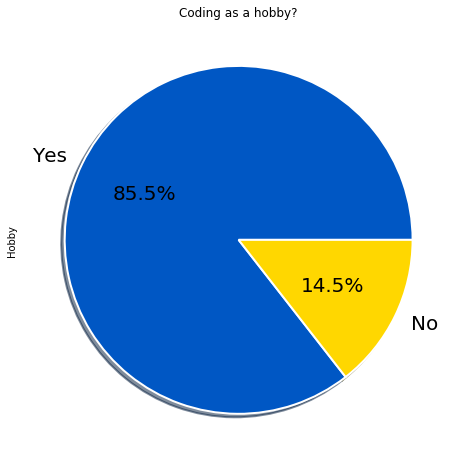

In [21]:
plt.figure(figsize=(8,8))
df["Hobby"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("prism",3),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Coding as a hobby?")
plt.show()

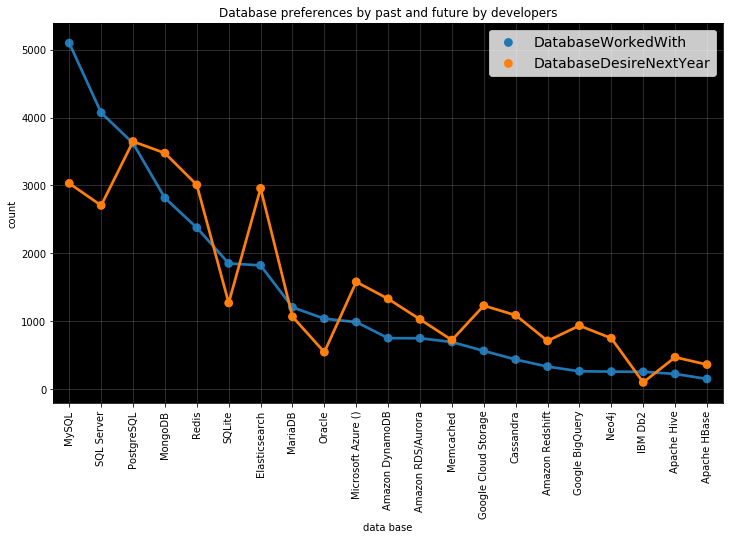

In [65]:
dat1 = df["DatabaseWorkedWith"].str.split(";",expand=True).stack().reset_index()
dat1 = dat1[0].value_counts().reset_index()
dat1["type"] = "DatabaseWorkedWith"

dat2 = df["DatabaseDesireNextYear"].str.split(";",expand=True).stack().reset_index()
dat2 = dat2[0].value_counts().reset_index()
dat2["type"] = "DatabaseDesireNextYear"

data = pd.concat([dat1,dat2],axis=0)
data["index"] = data["index"].str.replace("(Tables, CosmosDB, SQL, etc)","")

plt.figure(figsize=(12,7))
ax = sns.pointplot("index",0,data=data,hue="type")
ax.set_facecolor("k")
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
plt.xlabel("data base")
plt.ylabel("count")
plt.legend(prop={"size":14})
plt.title("Database preferences by past and future by developers")
plt.show()

In [67]:
temp = pd.DataFrame(df['IDE'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Top most used IDE  by the developers (%) ",
    xaxis=dict(
        title='IDE Name',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [79]:
def funnel_chart(index, values):
    values = values
    phases = index
    colors = random_colors(10)
    n_phase = len(phases)
    plot_width = 400
    section_h = 100
    section_d = 10
    unit_width = plot_width / max(values)
    phase_w = [int(value * unit_width) for value in values]
    height = section_h * n_phase + section_d * (n_phase - 1)
    shapes = []
    label_y = []
    for i in range(n_phase):
            if (i == n_phase-1):
                    points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
            else:
                    points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

            path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

            shape = {'type': 'path','path': path,'fillcolor': colors[i],
                    'line': {
                        'width': 1,
                        'color': colors[i]
                    }
            }
            shapes.append(shape)
            label_y.append(height - (section_h / 2))
            height = height - (section_h + section_d)
    label_trace = go.Scatter(
        x=[-350]*n_phase,
        y=label_y,
        mode='text',
        text=phases,
        textfont=dict(
            color='rgb(200,200,200)',
            size=15
        )
    )

    value_trace = go.Scatter(
        x=[350]*n_phase,
        y=label_y,
        mode='text',
        text=values,
        textfont=dict(
            color='rgb(200,200,200)',
            size=15
        )
    )

    data = [label_trace, value_trace]
    layout = go.Layout(title="<b>Funnel Chart</b>",titlefont=dict(size=20,color='rgb(203,203,203)'),
        shapes=shapes,
        height=560,
        width=800,
        showlegend=False,
        paper_bgcolor='rgba(44,58,71,1)',
        plot_bgcolor='rgba(44,58,71,1)',
        xaxis=dict(
            showticklabels=False,
            zeroline=False,
        ),
        yaxis=dict(
            showticklabels=False,
            zeroline=False
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [75]:
def get_list(col_name):
    full_list = ";".join(col_name)
    each_word = full_list.split(";")
    each_word = Counter(each_word).most_common()
    return pd.DataFrame(each_word)

In [77]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]

In [80]:
#isn't working
data = get_list(df['OperatingSystem'].dropna())
funnel_chart(data[0][:5], data[1][:5])

TypeError: 'NoneType' object is not subscriptable

In [74]:
countries = df[['Country','Gender']]
countries = countries[countries['Gender'] == 'Female']
countries = countries['Country'].value_counts()

countries = countries.to_frame().reset_index()
countries.loc[2]['code'] = ''
for i,country in enumerate(countries['index']):
    user_input = country
    mapping = {country.name: country.alpha_3 for country in pycountry.countries}
    countries.set_value(i, 'code', mapping.get(user_input))
data = [ dict(
        type = 'choropleth',
        locations = countries['code'],
        z = countries['Country'],
        text = countries['index'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Total Female'),
      ) ]

layout = dict(
    title = 'countries with female employees',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

In [8]:
temp = df.set_index(['ConvertedSalary','Gender']).DevType.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','Gender'])
temp.columns = ['ConvertedSalary','Gender','job']
temp = temp.set_index(['ConvertedSalary','job']).Gender.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','job'])
temp.columns = ['MedianSalary','job','Gender']
temp = temp.groupby(['Gender','job'])['MedianSalary'].median().sort_values(ascending = False).reset_index()
temp1 = temp[temp.Gender == 'Male']
temp2 = temp[temp.Gender == 'Female']
trace1 = go.Bar(
    x = temp1.job,
    y = temp1.MedianSalary,
    name='Male'
)
trace2 = go.Bar(
    x = temp2.job,
    y = temp2.MedianSalary,
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Top DevType with Median Salary(Male V.S. Female)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='DevType',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Median Salary ($)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [54]:
temp = df['HoursComputer'].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df1.iplot(kind='pie',labels='labels',values='values', title='Developers spend their time in front of desktop or computer on a typical day', hole = 0.5, color = ['#FFC124','#BFF8DF','#B7355','#BF3EFF','#FF6103','#FFC125'])

In [58]:
temp = df['HoursOutside'].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df1.iplot(kind='pie',labels='labels',values='values', title='Developers spend their time outside on a typical day', hole = 0.5,color = ['#E1C124','#A1F8DF','#AA355','#AF4EFF','#EF5103','#EFB125'])

In [63]:
# locale
traces = []
#print(stack_data['CompanySize'].unique())
def change_to_int(x):
    #print(x)
    x = x.split(" ")
    if x[0]=='Under':
        return '0 - 18 years old'
    #print(locale.atoi(x[0]))
    return str(int(x[0].replace(',', '')))+' '+' '.join(x[1:])
    
df['Age'] = df['Age'].dropna().apply(change_to_int)#map({'Fewer than 10 employees' : '0 to 10'})
#print(temp.unique())
newDiamond = df.groupby(['Age','JobSatisfaction']).size().unstack().sort_values(by ='Age')
for c in newDiamond.columns:
    traces.append({
        'type' : 'scatter',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Does job satisfaction depends on Age ?',
        'xaxis' :dict(
        title='Age of the Developer',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),        
    }
}
iplot(fig)